## **Concrete Compressive Strength Prediction**

The most straightforward way of determining concrete compressive strength is through physical testing (preparing concrete cylinders and then crushing it using a universal testing machine), however this method is not always feasible (e.g. due to availability of testing machine and cost of preparation of cylinders). An alternative way of determining concrete strength is through use of prediction models. If an initial investment of ensuring collection of quality data, a prediction model could be built where if accuracted could be a cost-efficient way to determine concrete strength. Concrete strength is dependent on its ratio of materials and age, so these can be used as the predictor variables for a regression model.

The objective of this study is to explore the application of different regression models to a concrete compressive strength dataset from a study by [I-Cheng Yeh](https://www.semanticscholar.org/paper/Modeling-of-strength-of-high-performance-concrete-Yeh/9310cae70452ea11465f338483e79cc36a68881c) and evaluate the models using performance metrics.

**Source**: Yeh,I-Cheng. (2007). Concrete Compressive Strength. UCI Machine Learning Repository. https://doi.org/10.24432/C5PK67.

### **Importing libraries**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [4]:
# Reading file
df = pd.read_excel('concrete.xls')

In [5]:
# Check dataframe
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [6]:
# Check data type
df.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [7]:
# Checking for missing data
print("Total missing data")
df.isnull().sum()

Total missing data


Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

#### **Summary Statistics**

In [9]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [10]:
# Renaming columns
column_names = ['cement','bf_slag','fly_ash','water','s_plasticizer','coarse_agg','fine_agg','age_day','strength_mpa']
df.columns = column_names

### **Feature Distribution**

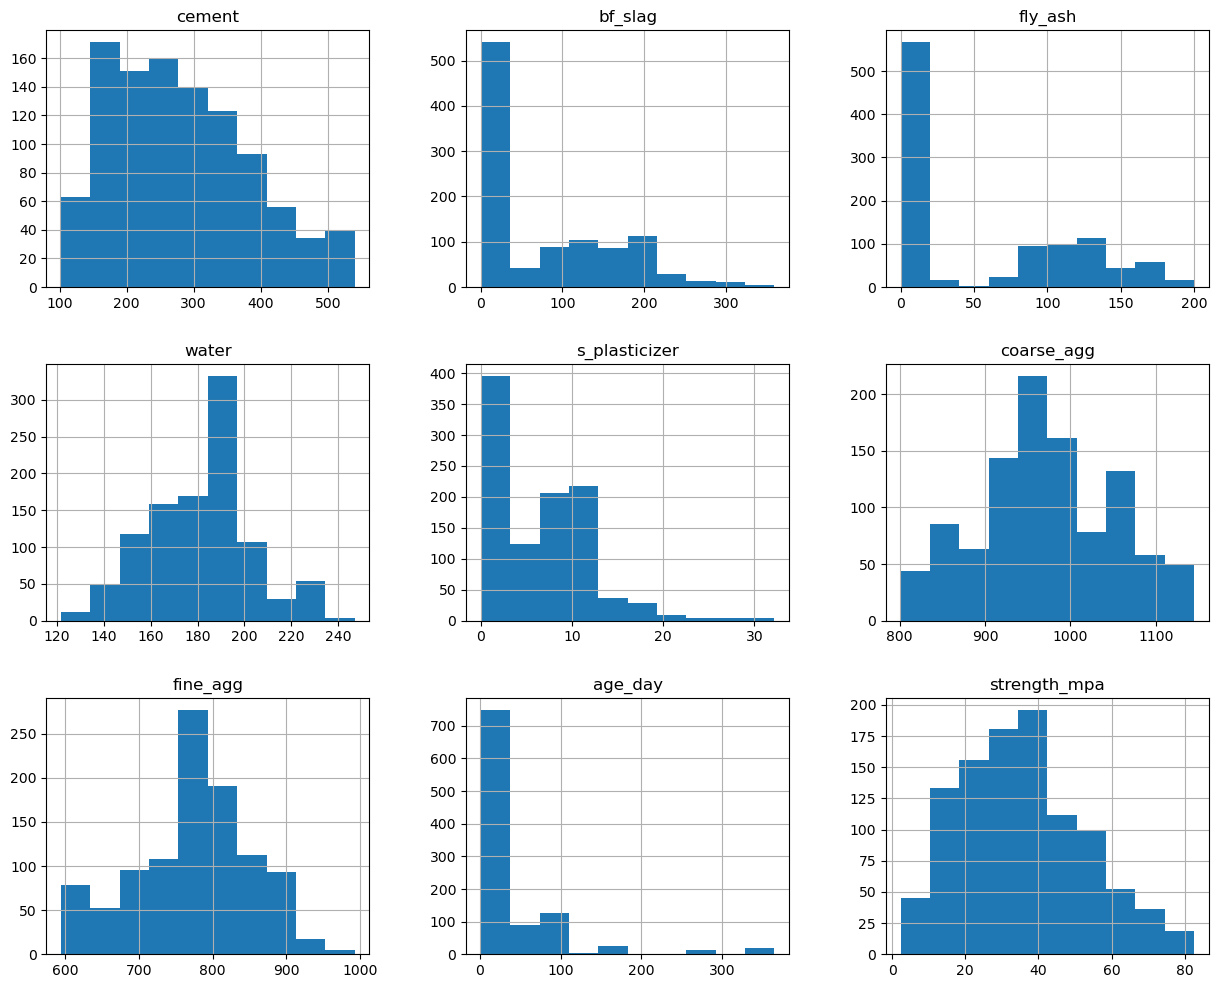

In [12]:
# Check feature distribution
df.hist(figsize=(15,12),bins = 10)
plt.show()

### **Data Preprocessing**

In [14]:
# scaler = preprocessing.MinMaxScaler()
# df = scaler.fit_transform(df)
# df = pd.DataFrame(df, columns=column_names)

### **Data Splitting**

In [16]:
# Split dataframe to X and y (feature and target)
X = df.iloc[:,0:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

# Split into (training/validation)/test set (60/20/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Checking shape
print("Number of examples for each set")
print("")
print(f"Training/Validation set: {X_train.shape[0]}")
print(f"Testing set: {X_test.shape[0]}")

Number of examples for each set

Training/Validation set: 824
Testing set: 206


### **Correlation Matrix**

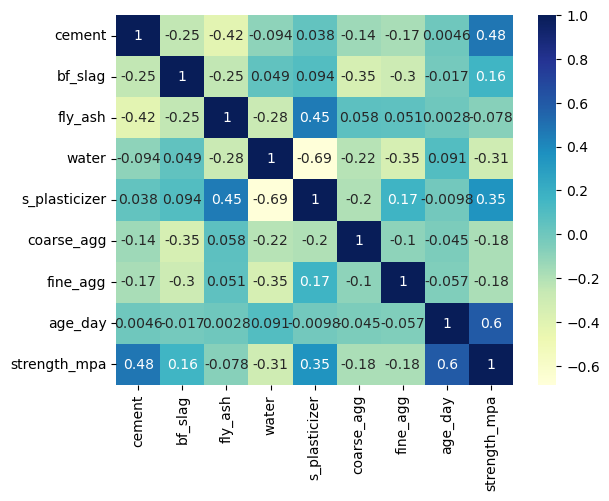

In [18]:
# Plotting correlation heatmap 
sns.heatmap(df.corr(method='spearman'), cmap="YlGnBu", annot=True)
plt.show() 

**Features with highest correlation with target variable, strength:**

1.) Age (r = .6)\
2.) Cement (r = .48)\
3.) Superplasticizer (r = .35)

**Features that are highly correlated:**

1.) Superplasticizer and water (r = -.69)

### **Mutual Information**

<Axes: ylabel='feature'>

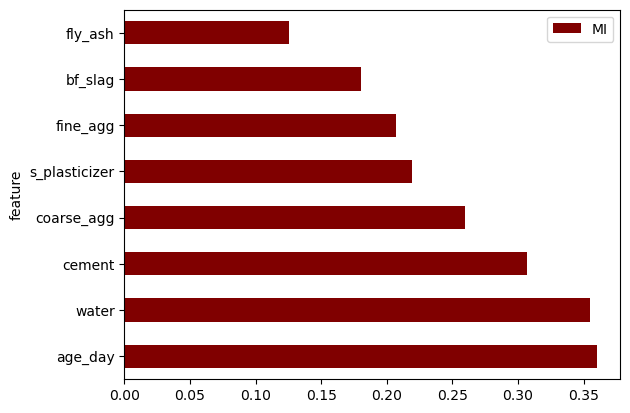

In [21]:
mutual_info = mutual_info_regression(X, y)
mi_data = {"feature" : df.columns[:-1],
            "MI" : mutual_info}
mi_df = pd.DataFrame(mi_data).sort_values(by=['MI'], ascending=False).set_index('feature')
mi_df.plot(kind='barh', color='maroon')                    

### **Model Training**

In [23]:
# Initialization
models = {'Multiple Linear Regression' : LinearRegression(),
         'Decision Tree' : tree.DecisionTreeRegressor(),
         'Random Forest' : RandomForestRegressor(random_state=0),
         'Gradient Boost' : GradientBoostingRegressor(random_state=0, n_estimators=200),
         'XGBoost' : XGBRegressor(objective="reg:squarederror", random_state=0, verbosity=0)}

In [24]:
# Training model and evaluating using 10 fold - cross validation

df_val = pd.DataFrame(columns=['Model','Score']) # Dataframe containing model score

for model in models:
    
    models[model].fit(X_train, y_train)
    
    # create a new row
    new_row = {'Model': model, 'Score': cross_val_score(models[model], X_train, y_train, cv=10).mean()}

    # append the new row to the DataFrame
    df_val = df_val._append(new_row, ignore_index=True)
    
df_val

,Model,Score
0,Multiple Linear Regression,0.621874
1,Decision Tree,0.839249
2,Random Forest,0.907167
3,Gradient Boost,0.924778
4,XGBoost,0.925840


### **Model Evaluation**

In [26]:
# Evaluating using test data

df_test = pd.DataFrame(columns=['Model','Score']) # Dataframe containing model score

for model in models:
    
    # create a new row
    new_row = {'Model': model, 'Score': models[model].score(X_test, y_test)}

    # append the new row to the DataFrame
    df_test = df_test._append(new_row, ignore_index=True)

df_test

,Model,Score
0,Multiple Linear Regression,0.520962
1,Decision Tree,0.746049
2,Random Forest,0.896905
3,Gradient Boost,0.901552
4,XGBoost,0.905809


#### **Actual vs Predicted Plot**

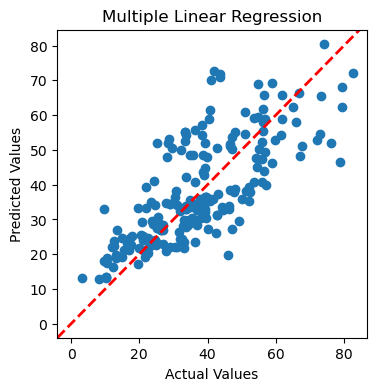

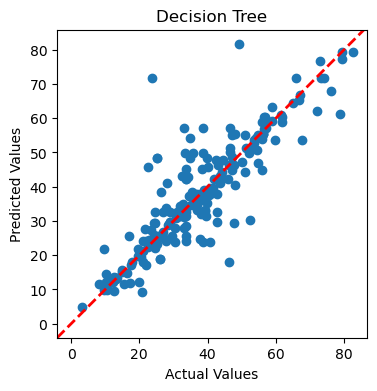

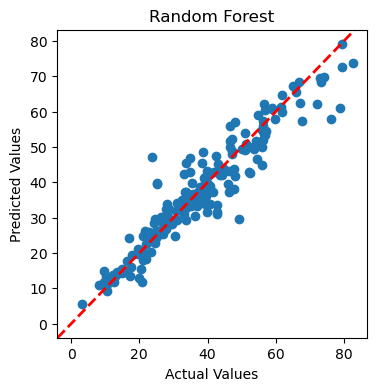

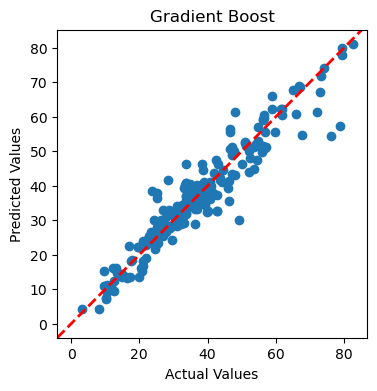

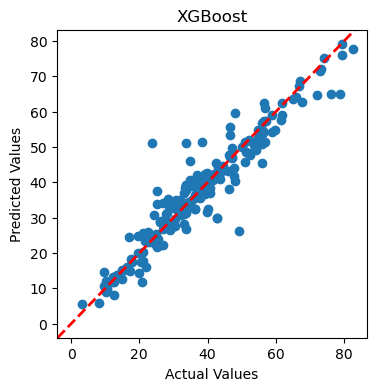

In [28]:
for model in models:
    
    plt.figure(figsize=(4,4))
    plt.scatter(y_test, models[model].predict(X_test))
    plt.axline((0, 0), (1, 1), linewidth=2, color='r', linestyle='--')
    plt.xlabel('Actual Values') 
    plt.ylabel('Predicted Values') 
    plt.title(f'{model}') 
    
    plt.show()

### **Conclusion**

Based from the calculated model performances, for predicting concrete strength with the most accuracy it is recommended to use ensemble learning methods such as Random Forest, Gradient Boost and XGBoost.